In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
os.chdir('C:\Heart Disease Prediction')
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X=df.drop("target",axis=1)
y=df["target"]

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


<Axes: xlabel='target', ylabel='count'>

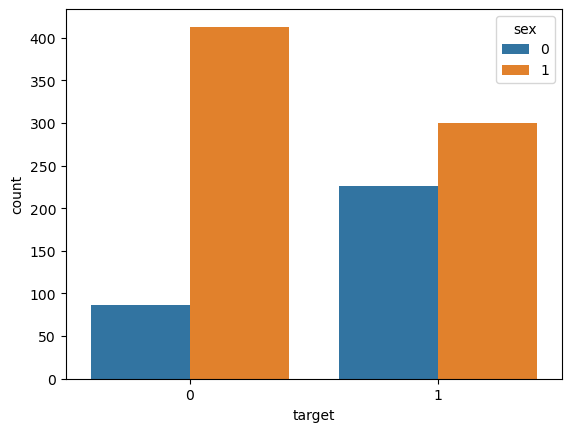

In [8]:
sns.countplot(x=df['target'],hue='sex',data=df)

<Axes: xlabel='target', ylabel='count'>

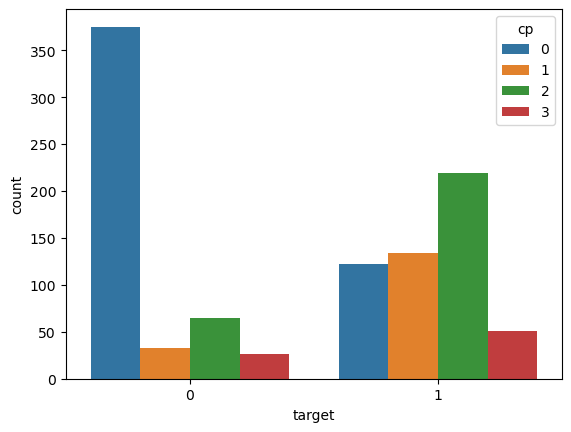

In [9]:
sns.countplot(x=df['target'],hue='cp',data=df)

<Axes: xlabel='sex', ylabel='count'>

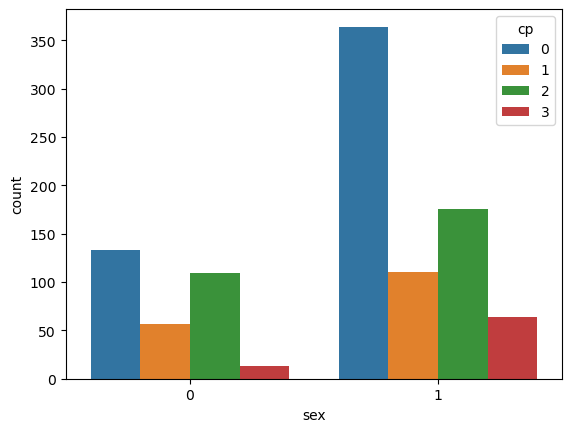

In [10]:
sns.countplot(x=df['sex'],hue='cp',data=df)

<Axes: xlabel='sex', ylabel='trestbps'>

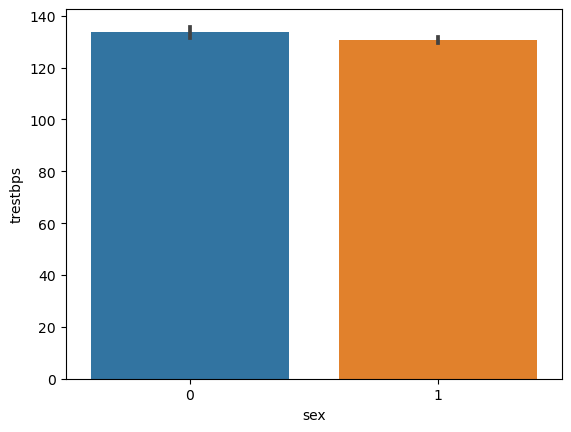

In [11]:
sns.barplot(x=df['sex'],y=df['trestbps'],data=df)

<Axes: xlabel='age', ylabel='chol'>

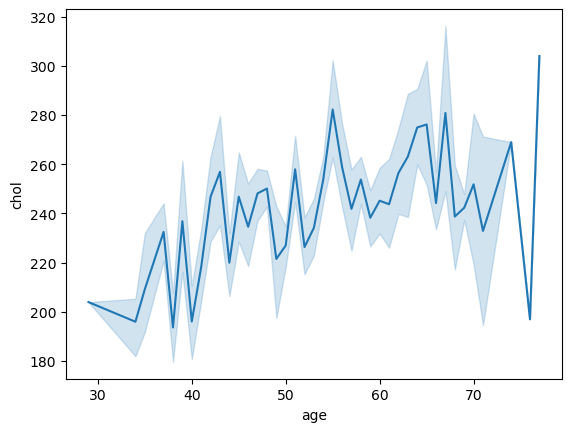

In [12]:
sns.lineplot(x=df['age'],y=df['chol'],data=df)

<Axes: xlabel='age', ylabel='trestbps'>

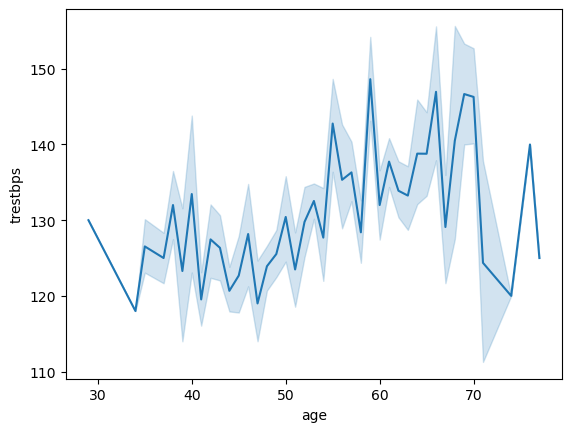

In [13]:
sns.lineplot(x=df['age'],y=df['trestbps'],data=df)

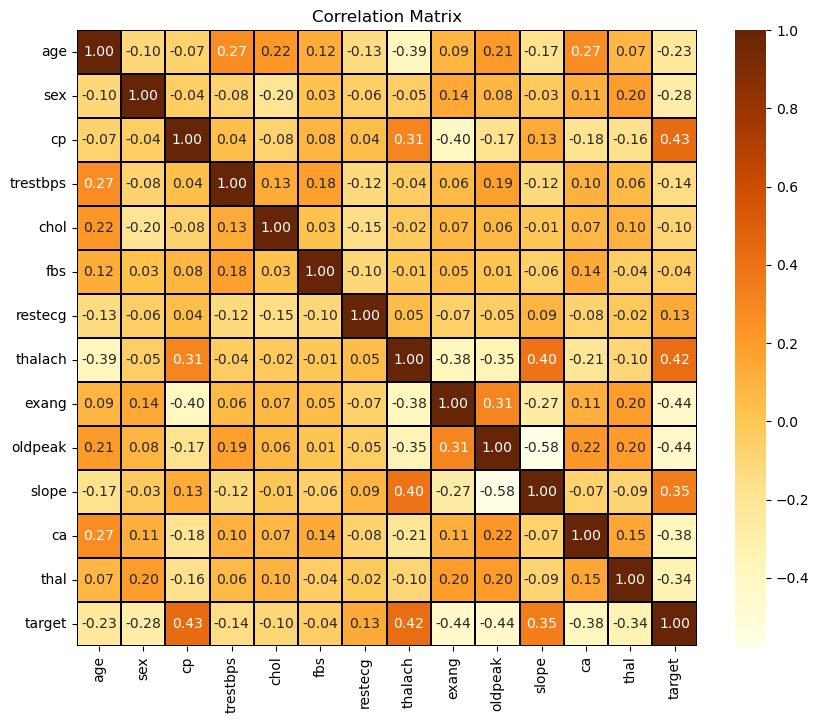

In [14]:
# Create a correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,linewidths= 0.2, linecolor= 'black', fmt=".2f", cmap="YlOrBr")
plt.title('Correlation Matrix')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
y=LabelEncoder().fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
bnb=BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [29]:
classy = {
    'SVC' : svc,
    'K-Neighbors' : knc,
    'Gaussian-NaiveBay': gnb, 
    'Bernoulli-NaiveBay': bnb,
    'Decision Tree': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest': rfc, 
    'AdaBoost': abc, 
    'ExtraTree': etc,
    'Gradient Boosting':gbdt,
}

In [30]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [31]:
accuracy_scores = []
precision_scores = []

for name,clf in classy.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

 SVC
Accuracy -  0.8146341463414634
Precision -  0.76

 K-Neighbors
Accuracy -  0.8341463414634146
Precision -  0.8

 Gaussian-NaiveBay
Accuracy -  0.8
Precision -  0.7540983606557377

 Bernoulli-NaiveBay
Accuracy -  0.7951219512195122
Precision -  0.7652173913043478

 Decision Tree
Accuracy -  0.8439024390243902
Precision -  0.784

 Logistic Regression
Accuracy -  0.7951219512195122
Precision -  0.7563025210084033

 Random Forest
Accuracy -  0.9853658536585366
Precision -  1.0

 AdaBoost
Accuracy -  0.8780487804878049
Precision -  0.89

 ExtraTree
Accuracy -  1.0
Precision -  1.0

 Gradient Boosting
Accuracy -  0.8975609756097561
Precision -  0.8727272727272727



In [32]:
performance_df = pd.DataFrame({'Algorithm':classy.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
8,ExtraTree,1.000000,1.000000
6,Random Forest,0.985366,1.000000
9,Gradient Boosting,0.897561,0.872727
7,AdaBoost,0.878049,0.890000
4,Decision Tree,0.843902,0.784000
1,K-Neighbors,0.834146,0.800000
0,SVC,0.814634,0.760000
2,Gaussian-NaiveBay,0.800000,0.754098
3,Bernoulli-NaiveBay,0.795122,0.765217
5,Logistic Regression,0.795122,0.756303
